In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
df = pd.read_csv("./data/preprocessing_data.csv")
del df["Unnamed: 0"]

## Shuffle data

In [3]:
np_array = df.to_numpy()
np.random.shuffle(np_array)

In [4]:
np_array

array([[ 54.   ,  59.   ,  10.   ,  10.   ,   0.753],
       [ 24.   ,  30.   ,  10.   ,   0.   ,   0.434],
       [114.   ,  60.   ,  30.   ,  10.   ,   0.926],
       ...,
       [ 51.   ,  56.   ,  50.   ,   0.   ,   0.684],
       [  0.   ,  30.   ,  50.   ,   5.   ,   0.   ],
       [102.   ,  60.   ,  10.   ,  10.   ,   0.86 ]])

In [5]:
X = np_array[:,:-1]
y = np_array[:,-1]

## Split data (Train : Test)

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.33, random_state=42)

In [7]:
print("train_X shape :",train_X.shape)
print("test_X shape :",test_X.shape)
print("train_y shape :",train_y.shape)
print("test_y shape :",test_y.shape)

train_X shape : (412, 4)
test_X shape : (203, 4)
train_y shape : (412,)
test_y shape : (203,)


## Support vector Regrssion

In [8]:
svr_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [9]:
svr_regr.fit(train_X,train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [10]:
lr_pred_svr = svr_regr.predict(X=test_X)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(lr_pred_svr, test_y)))
print("R2:", metrics.r2_score(test_y, lr_pred_svr))

RMSE:  0.1543875051064834
R2: 0.5284004111573436


### x-axis : Real <------> y-axis : predict

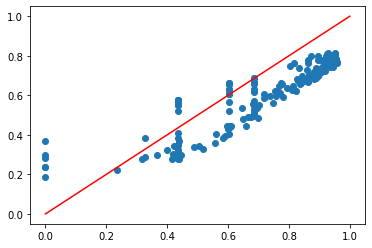

In [11]:
plt.scatter(x=test_y, y=lr_pred_svr)
plt.plot([0,1],[0,1], color='r')
plt.show()